In [6]:
# Importando bibliotecas
#%matplotlib inline
import pandas as pd 
from pycaret.clustering import *

In [7]:
# Lendo a base de dados
df = pd.read_csv("/content/drive/MyDrive/machine learning/dataset/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.drop(columns=["CustomerID"], inplace=True)

In [9]:
s = setup(df)

,Description,Value
0,Session id,575
1,Original data shape,"(200, 4)"
2,Transformed data shape,"(200, 4)"
3,Ordinal features,1
4,Numeric features,3
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [10]:
kmeans = create_model("kmeans", num_clusters=6) # decidimos o numero de clusters depois de ver o evaluate model, linha 12(apenas de ele mostrar 5, é mais preciso no 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4521,166.5764,0.7449,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
kmeans

KMeans(n_clusters=6, random_state=575)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

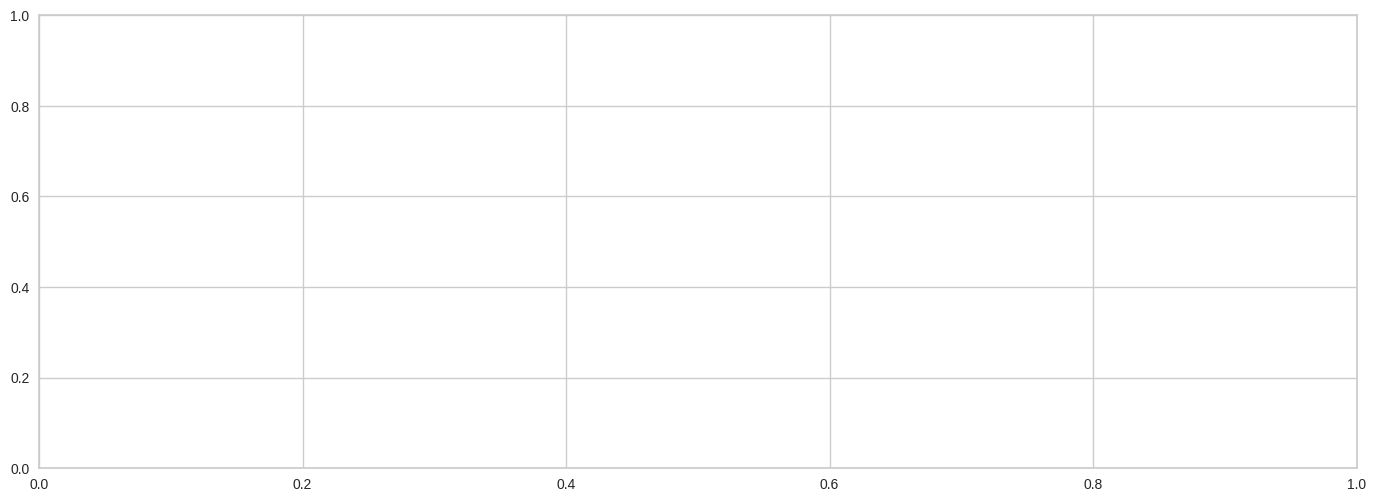

In [13]:
evaluate_model(kmeans)

In [14]:
result = assign_model(kmeans) # DatasSet com uma nova coluna que mostra os clusters
result

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 5
1,Male,21,15,81,Cluster 4
2,Female,20,16,6,Cluster 5
3,Female,23,16,77,Cluster 4
4,Female,31,17,40,Cluster 5
...,...,...,...,...,...
195,Female,35,120,79,Cluster 3
196,Female,45,126,28,Cluster 0
197,Male,32,126,74,Cluster 3
198,Male,32,137,18,Cluster 0


In [16]:
cluster1 = result[result.Cluster == 'Cluster 0']

In [17]:
cluster1

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
126,Male,43,71,35,Cluster 0
128,Male,59,71,11,Cluster 0
130,Male,47,71,9,Cluster 0
134,Male,20,73,5,Cluster 0
136,Female,44,73,7,Cluster 0
138,Male,19,74,10,Cluster 0
140,Female,57,75,5,Cluster 0
144,Male,25,77,12,Cluster 0
146,Male,48,77,36,Cluster 0
148,Female,34,78,22,Cluster 0


In [18]:
cluster1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,35.000000,35.000000,35.000000
mean,41.685714,88.228571,17.285714
std,10.897305,16.367266,10.211215
min,19.000000,71.000000,1.000000
25%,35.000000,77.500000,10.000000
50%,43.000000,85.000000,16.000000
75%,47.500000,97.500000,23.500000
max,59.000000,137.000000,39.000000


In [19]:
import plotly.express as px
fig = px.scatter(result, x="Annual Income (k$)", y="Spending Score (1-100)", title="Renda x Score", color="Cluster")
fig.show()